In [38]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax import jacfwd
import jax_cosmo as jc
import numpy
import matplotlib.pyplot as plt
import scipy

In [39]:
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")
jax.config.update("jax_debug_nans", True)

In [40]:
def single(a,b):
    return jnp.sum(a)+jnp.sum(b)

In [41]:
def multi(a,b):
    return vmap(single,(0,0))(a,b)

In [42]:
def multi2(a,b):
    ans=0.
    for a_,b_ in zip(a,b):
        ans += single(a_,b_)
    return ans

In [43]:
a=numpy.array([1,3,5])
b=numpy.array([3,2])
a_=[a,numpy.array([4,6,7,8])]
b_=[b,numpy.array([3,1,1])]

In [44]:
single(a,b)

Array(14, dtype=int64)

In [45]:
multi2(a_,b_)

Array(44., dtype=float64, weak_type=True)

In [46]:
mat=numpy.zeros((2,2))+4
mat[range(2),range(2)]=mat[range(2),range(2)]+[.1,.2]
print(mat)

[[4.1 4. ]
 [4.  4.2]]


In [78]:
dm_int=0.1
dm_obs=numpy.array([0.02,0.03])
cov = (numpy.zeros((2,2))+dm_int**2)+numpy.identity(2)*dm_obs**2
L, lower = scipy.linalg.cho_factor(cov)
data=(numpy.zeros(2)+numpy.random.normal(0,dm_int))+ numpy.random.normal(0,dm_obs)

x = scipy.linalg.solve_triangular(L, data, trans=1, lower=lower)
print(numpy.dot(data,numpy.dot(invcov,data)),numpy.dot(x,x))

# print(L, scipy.linalg.cholesky(cov))
# invcov = numpy.linalg.inv(cov)

3.664942383051055 3.6649423830510486


In [48]:
cov2 = numpy.identity(2)*dm_obs**2
L2= scipy.linalg.cholesky(cov2)

In [66]:
data_=[]
data2_=[]
for i in range(10):
    data=(numpy.zeros(2)+numpy.random.normal(0,dm_int))+ numpy.random.normal(0,dm_obs)
    x = scipy.linalg.solve_triangular(L[0], data)
    # data_.append(numpy.dot(x,x))
    data_.append(numpy.dot(data,numpy.dot(invcov,data)))
    data2_.append(numpy.dot(x,x))
    print(numpy.dot(data,numpy.dot(invcov,data)),numpy.dot(x,x))
    wef
    # data=numpy.random.normal(0,dm_obs)
    # x = scipy.linalg.solve_triangular(L2, data)
    # data2_.append(numpy.dot(x,x))
data_=numpy.sort(data_)
data2_=numpy.sort(data2_)

1.1355982334377672 11.274255336813752


NameError: name 'wef' is not defined

In [37]:
data_[int(10000*.6827)]

IndexError: index 6827 is out of bounds for axis 0 with size 10

In [236]:
data2_[0:2]

array([1.22763846e-05, 2.54195693e-05])

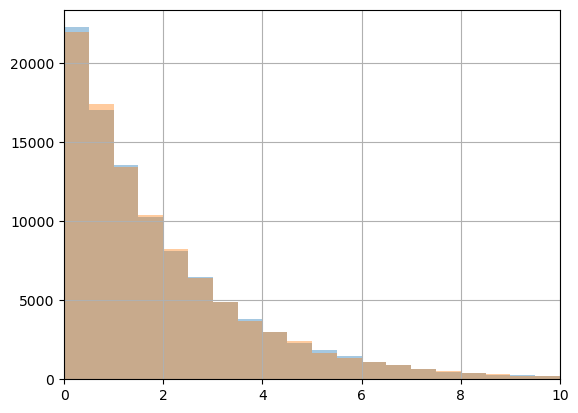

In [254]:
plt.hist(data_,bins=numpy.linspace(0,10,21),alpha=0.4)
plt.hist(data2_,bins=numpy.linspace(0,10,21),alpha=0.4)
plt.xlim((0,10))
plt.grid()

In [250]:
data_=[]
for i in range(100000):
    data=(numpy.zeros(2)+numpy.random.normal(0,dm_int))+ numpy.random.normal(0,dm_obs)
    data_.append(data)

print(dm_int, dm_obs)
print(numpy.cov(data_,rowvar=False))


0.1 [0.02 0.03]
[[0.01038405 0.00998584]
 [0.00998584 0.01088657]]


In [123]:
numpy.dot(x,x)

16.030081395810242

In [132]:
data = numpy.random.normal(size=2)
print(data)

[-0.04093584  1.62291939]


In [133]:
data = numpy.dot(L,data)

In [134]:
data

array([0.15496569, 0.05816792])

In [135]:
x = scipy.linalg.solve_triangular(L, data)

In [136]:
x

array([-0.04093584,  1.62291939])